In [15]:
import sys
sys.path.append('../')
import sqlite3
import pandas as pd 
import numpy as np 
import ta 
from backtester import *

In [16]:
conn = sqlite3.connect('../PriceData/PriceData_m5.db')

In [17]:
data = pd.read_sql("SELECT * FROM 'EUR/USD'", conn, parse_dates=['date'], index_col=['date'])
data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2021-08-31 03:50:00,1.18172,1.18187,1.18188,1.18172,1.18185,1.18199,1.18201,1.18184,397
2021-08-31 03:55:00,1.18187,1.18189,1.18193,1.18174,1.18199,1.18201,1.18204,1.18187,429
2021-08-31 04:00:00,1.18189,1.18182,1.18190,1.18173,1.18201,1.18193,1.18201,1.18185,432
2021-08-31 04:05:00,1.18182,1.18191,1.18192,1.18178,1.18193,1.18204,1.18204,1.18191,294
2021-08-31 04:10:00,1.18191,1.18193,1.18201,1.18188,1.18204,1.18205,1.18213,1.18200,486
...,...,...,...,...,...,...,...,...,...
2021-10-18 13:15:00,1.15994,1.16033,1.16036,1.15994,1.16008,1.16044,1.16047,1.16008,1428
2021-10-18 13:20:00,1.16033,1.16071,1.16073,1.16033,1.16045,1.16084,1.16085,1.16044,1301
2021-10-18 13:25:00,1.16072,1.16103,1.16110,1.16063,1.16084,1.16115,1.16122,1.16075,1235


In [18]:
for col in ['open', 'close', 'high', 'low']:
    data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)

In [19]:
data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,close,high,low
date,,,,,,,,,,,,,
2021-08-31 03:50:00,1.18172,1.18187,1.18188,1.18172,1.18185,1.18199,1.18201,1.18184,397,1.181785,1.181930,1.181945,1.181780
2021-08-31 03:55:00,1.18187,1.18189,1.18193,1.18174,1.18199,1.18201,1.18204,1.18187,429,1.181930,1.181950,1.181985,1.181805
2021-08-31 04:00:00,1.18189,1.18182,1.18190,1.18173,1.18201,1.18193,1.18201,1.18185,432,1.181950,1.181875,1.181955,1.181790
2021-08-31 04:05:00,1.18182,1.18191,1.18192,1.18178,1.18193,1.18204,1.18204,1.18191,294,1.181875,1.181975,1.181980,1.181845
2021-08-31 04:10:00,1.18191,1.18193,1.18201,1.18188,1.18204,1.18205,1.18213,1.18200,486,1.181975,1.181990,1.182070,1.181940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18 13:15:00,1.15994,1.16033,1.16036,1.15994,1.16008,1.16044,1.16047,1.16008,1428,1.160010,1.160385,1.160415,1.160010
2021-10-18 13:20:00,1.16033,1.16071,1.16073,1.16033,1.16045,1.16084,1.16085,1.16044,1301,1.160390,1.160775,1.160790,1.160385
2021-10-18 13:25:00,1.16072,1.16103,1.16110,1.16063,1.16084,1.16115,1.16122,1.16075,1235,1.160780,1.161090,1.161160,1.160690


In [20]:
data['AO'] = ta.momentum.awesome_oscillator(high=data['high'], low=data['low'], 
                                            window1=100, window2=200, fillna=False)
data.dropna(axis=0, inplace=True)

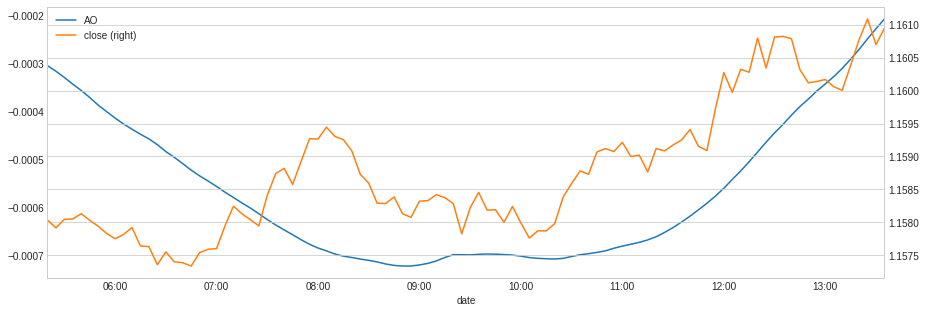

In [21]:
data[['AO', 'close']].iloc[-100:].plot(figsize=(15, 5), secondary_y=['close'])
# plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [22]:
data['AO'].describe()

count    9801.000000
mean       -0.000122
std         0.000718
min        -0.002868
25%        -0.000524
50%        -0.000065
75%         0.000317
max         0.001823
Name: AO, dtype: float64

In [23]:
data['signal'] = np.where(data['AO'] > 0, 1, 
                          np.where(data['AO'] < 0, -1, 0))

In [24]:
data['signal'].value_counts()

-1    5243
 1    4558
Name: signal, dtype: int64

In [25]:
data['signal'].diff(1).apply(np.abs).value_counts()

0.0    9746
2.0      54
Name: signal, dtype: int64

In [26]:
backtest = IterativeBacktester(data, data['signal'], 'm5')

In [27]:
backtest.backtest()

  0%|          | 0/9800 [00:00<?, ?it/s]

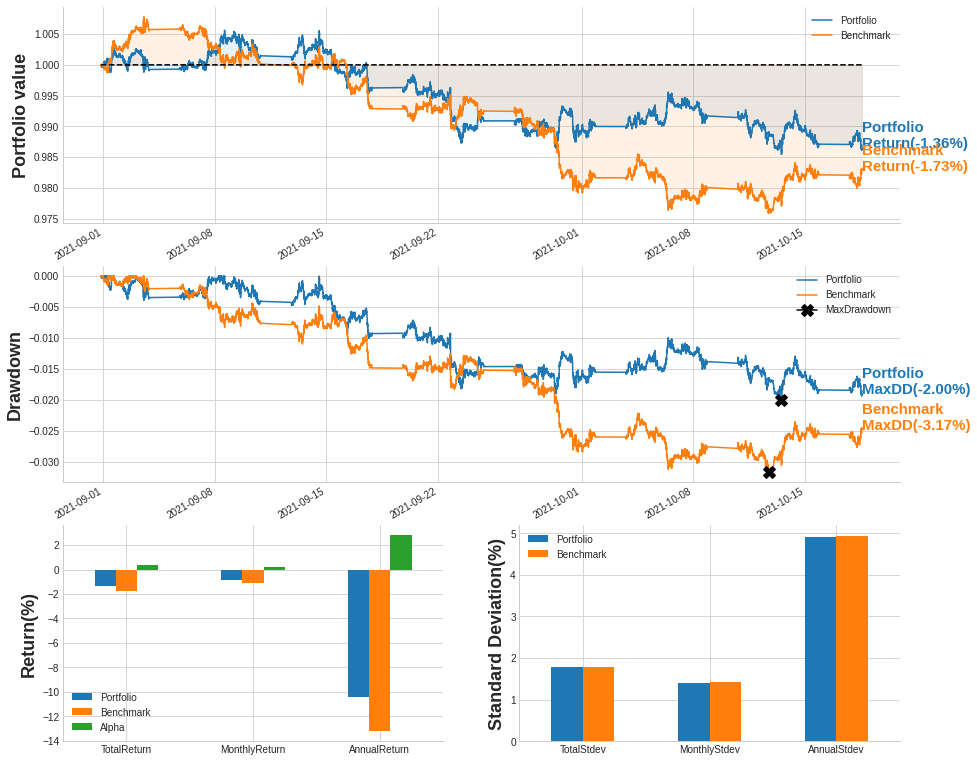

----------------------------------------------------------------------
Data length: |47 days 17:05:00|
Data range from |2021-08-31 20:30:00| to |2021-10-18 13:35:00|
----------------------------------------------------------------------
***** Portfolio Returns in percentage(%) *****
╒═══════════════╤═════════════╤═════════════╤═════════╕
│               │   Portfolio │   Benchmark │   Alpha │
╞═══════════════╪═════════════╪═════════════╪═════════╡
│ TotalReturn   │      -1.363 │      -1.731 │   0.367 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ MonthlyReturn │      -0.857 │      -1.088 │   0.231 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ AnnualReturn  │     -10.429 │     -13.240 │   2.811 │
╘═══════════════╧═════════════╧═════════════╧═════════╛
***** Portfolio Standard Deviation in percentage(%) *****
╒══════════════╤═════════════╤═════════════╕
│              │   Portfolio │   Benchmark │
╞══════════════╪═════════════╪═════════════╡
│ TotalStdev   │   

In [28]:
backtest.results()